In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import svm

### Iris 데이터 불러오기, Train/Test set 분할

In [2]:
iris = load_iris()
X = iris.data[:, :4] # 훈련 데이터 (2개의 특징만 사용), 3개의 특징을 사용하고 싶은 경우 iris.data[:, :3], 4개의 특징을 모두 사용하고 싶은 경우 iris.data[:, :4]
y = iris.target

# 성능 측정을 위한 train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=True, stratify=y, random_state=30) # test_size: 테스트에 사용할 비율. 0 ~ 1.0 사이의 값

In [3]:
print(np.shape(x_train))
print(np.shape(y_train))
print(np.shape(x_test))
print(np.shape(y_test))

(105, 4)
(105,)
(45, 4)
(45,)


In [4]:
x_train[:5]

array([[5.2, 3.4, 1.4, 0.2],
       [5.8, 2.7, 3.9, 1.2],
       [6.3, 3.3, 4.7, 1.6],
       [6.3, 2.8, 5.1, 1.5],
       [6.4, 2.7, 5.3, 1.9]])

In [5]:
y_train[:5]

array([0, 1, 1, 2, 2])

In [6]:
x_test[:5]

array([[5.7, 2.5, 5. , 2. ],
       [5. , 3.2, 1.2, 0.2],
       [6.1, 2.6, 5.6, 1.4],
       [5.6, 2.5, 3.9, 1.1],
       [6.4, 3.2, 5.3, 2.3]])

In [7]:
y_test[:5]

array([2, 0, 2, 1, 2])

### 학습 / 결과분석

In [8]:
clf = svm.SVC(kernel='rbf', C=1.0, gamma=0.1) # C와 gamma 값 변경해보기
clf.fit(x_train, y_train)

SVC(gamma=0.1)

In [9]:
# test set에 대한 예측(분류) 수행
prediction = clf.predict(x_test)

In [10]:
# test set에 대한 예측 결과
prediction

array([2, 0, 2, 1, 2, 0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 2, 1, 2, 0, 0, 2, 0,
       0, 2, 0, 0, 0, 1, 2, 1, 0, 1, 1, 2, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2,
       1])

In [11]:
# test set 정답 label
y_test

array([2, 0, 2, 1, 2, 0, 1, 0, 2, 2, 2, 0, 0, 0, 0, 2, 1, 2, 0, 0, 1, 0,
       0, 2, 0, 0, 0, 1, 2, 1, 0, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 2, 1, 2,
       1])

In [12]:
# 정확도 (accuracy)
(prediction==y_test).mean()

0.9333333333333333

In [13]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

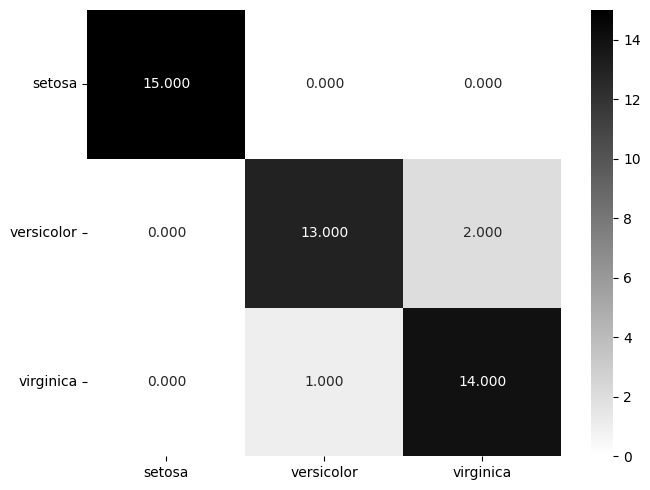

In [14]:
# confusion matrix 그리기
x_lab = iris.target_names
y_lab = iris.target_names

conf_matrix = confusion_matrix(y_test, prediction)
#conf_matrix = conf_matrix.astype('float') / conf_matrix.sum(axis=1)[:, np.newaxis] # 갯수가 아닌 비율로 표시하고 싶을 경우 주석 해제
plt.figure(figsize=(7,5)) # 그림의 size 지정
aa = sns.heatmap(conf_matrix, xticklabels = x_lab, yticklabels = y_lab, annot=True, fmt=".3f", cmap=plt.cm.binary)#, vmin = 0.0, vmax = 1.0)
plt.yticks(rotation='horizontal')
plt.tight_layout()

In [15]:
# precision, recall, F1
from sklearn.metrics import classification_report

print(classification_report(y_test, prediction, digits=4))

              precision    recall  f1-score   support

           0     1.0000    1.0000    1.0000        15
           1     0.9286    0.8667    0.8966        15
           2     0.8750    0.9333    0.9032        15

    accuracy                         0.9333        45
   macro avg     0.9345    0.9333    0.9333        45
weighted avg     0.9345    0.9333    0.9333        45

